In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df_wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header = None)

In [30]:
# 特徴寮データをXに、ラベルデータをyに格納
# df_wineの１列目はラベルデータ２列目以降は特徴量データ
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [31]:
#データ数と各データの特徴寮の数
print(X.shape)

(178, 13)


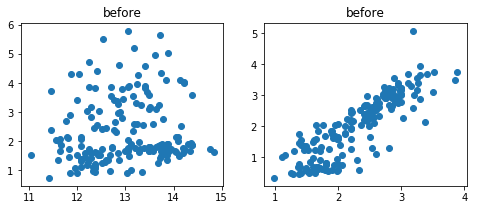

In [32]:
#標準化前のデータを可視化
#標準化によってアルコール度数やワインの色相など、単位も基準も異なる値も、様々なデータの種類も同じように扱うことができる
#plt.subplots()返り値はfigとaxesまたはaxesオブジェクトの配列
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8,3))
#?fig size
ax1.set_title('before')
ax2.set_title('before')
ax1.scatter(X[:, 0],X[:, 1])
ax2.scatter(X[:, 5], X[:, 6])
plt.show()

In [33]:
print('before')
plt.subplots()
X = (X-X.mean(axis=0))/X.std(axis=0)

before


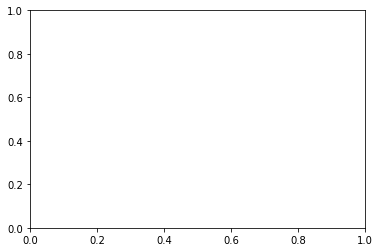

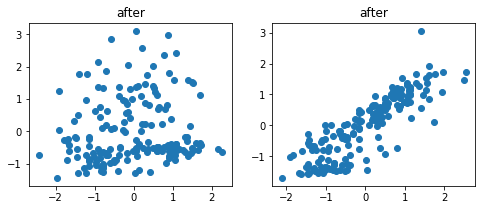

after
mean:  [ -8.38280756e-16  -1.19754394e-16  -8.37033314e-16  -3.99181312e-17
  -3.99181312e-17   0.00000000e+00  -3.99181312e-16   3.59263181e-16
  -1.19754394e-16   3.49283648e-17   1.99590656e-16   3.19345050e-16
  -1.59672525e-16] 
std:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [34]:
# 標準化後のデータを可視化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
ax1.set_title('after')
ax2.set_title('after')
ax1.scatter(X[:, 0], X[:, 1])
ax2.scatter(X[:, 5], X[:, 6])
plt.show()
print("after")
print("mean: ", X.mean(axis=0), "\nstd: ", X.std(axis=0))

In [36]:
#特徴量ごとの類似度を調べる

#相関行列を取得する
#Xを転置(行と列を入れ替え)しているのはデータ同士の相関係数ではなく特徴同士の相関係数を求める為のもの
R = np.corrcoef(X.T)

In [40]:
#得られた相関行列に固有値分解を適用し、固有値ベクトルと、固有値取得する
#固有値分解を行うことによって13*13次元の行列Rは13個の特別な13次元ベクトル（固有ベクトル)
#v1~v13個の特別な数（固有値）λ1~λ１３に分解される。
#元の行列は固有ベクトルの方向に情報が向いており、対応する固有値は情報の周遊度合いを示す。
#相関行列の固有ベクトルが主成分ベクトルを表し、固有ベクトルの成分は各特徴量の主成分への影響の様子
#を表す
#また大きな固有値に対応する固有ベクトルほど元の行列の構成に深く関わっている
#つまり小さい固有値に対応する固有ベクトルを無視することで、特徴量を削減しつつ情報の損失を少なく抑える
#ことができる

#numpy.linalg.eighの戻り値は２つあり、１つ目の固有値は昇順になり、それぞれがその多重度にしたがって
#繰り返される
#2つめは、v[:,1]の列は、固有値w[i]対応する正規化された固有ベクトル。入力変数が行列オブジェクトの場合
#行列オブジェクトを返す
eigvals,eigvecs = np.linalg.eigh(R)

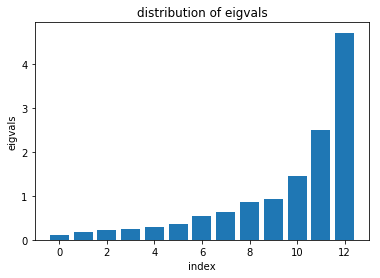

[ 0.10337794  0.16877023  0.22578864  0.25090248  0.28887994  0.34849736
  0.55102831  0.64165703  0.85322818  0.91897392  1.44607197  2.49697373
  4.70585025]


In [44]:
#可視化
#bar引数は（x座標,y座標)
plt.bar(range(13),eigvals)
plt.title('distribution of eigvals')
plt.xlabel('index')
plt.ylabel('eigvals')
plt.show()
print(eigvals)

固有値に大きな隔たりがある

In [45]:
#最大の固有値と２番目に大きい固有値に対応する２つのベクトルを用いて、13次元の特徴量を２次元に変換する
#13*2の行列Wを作り、13次元特徴量を持つwineデータXを第一主成分と第二主成分の２次元の特徴量のみ
#を持つ新たなデータX'に変換する
#多次元配列の結合を行うオブジェクトnp.c_(vstach)とnp.r_(hstach)
#スライス表記で配列を作成できる
#配列ではないただの数値も結合できる
#np.r_はaxis = 0-の方向に結合

W = np.c_[eigvecs[:,-1], eigvecs[:,-2]]

In [46]:
#行列Wと元のデータXとの積を取ることにより、Xを圧縮した行列X'を生成できる
X_pca = X.dot(W)

上記の流れをsklearnのPCAクラスを用いて簡単に実装できる

In [48]:
from sklearn.decomposition import PCA

In [51]:
#主成分分析のインスタンス,
#主成分数は2

pca = PCA(n_components=2)

In [53]:
#データから変換モデルを学習して、変換する
#内部で自動的に変換行列を生成

X_pca = pca.fit_transform(X)

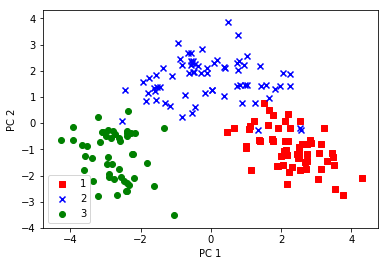

In [55]:
#可視化

color = ['r','b','g']
marker = ['s','x','o']
#np.unique(array変数)の形で、array変数の要素の重複をなくしたものを返す　lenで確認
for label,color,marker in zip(np.unique(y), color, marker):
    plt.scatter(X_pca[y==label,0],X_pca[y==label,1],c=color,marker=marker,label=label)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [ ]:
#回帰分析の前処理に主成分分析を適用する
